
Результаты для разных размеров выборки:
   Sample Size        MSE       MAE        R2
0           50   1.381521  0.936637  0.945511
1          100   8.357259  2.056733  0.745620
2          200   7.867000  2.157014  0.806844
3          300   9.155488  2.352183  0.857758
4          400  22.325772  3.367215  0.738017
5          506  24.291119  3.189092  0.668759


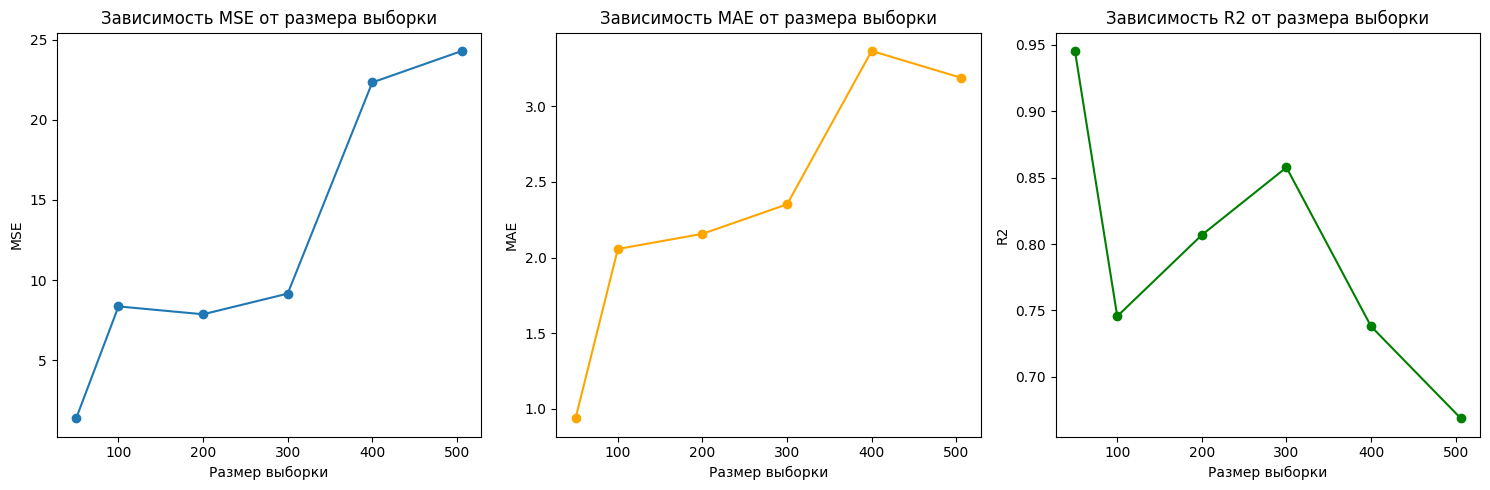

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

# Загрузка датасета Boston Housing
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

# Преобразуем данные в numpy массивы
X = df.drop('MEDV', axis=1).values  # Используем .values для преобразования в numpy array
y = df['MEDV'].values

# Функция для оценки модели (исправленная версия)
def evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, mae, r2

# Исследование влияния количества данных (исправленная версия)
sample_sizes = [50, 100, 200, 300, 400, 506]
results = []

for size in sample_sizes:
    # Выбираем подмножество данных
    X_subset = X[:size]
    y_subset = y[:size]
    
    # Разделяем на обучающую и тестовую выборки (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
    
    # Оцениваем модель
    mse, mae, r2 = evaluate_model(X_train, X_test, y_train, y_test)
    results.append((size, mse, mae, r2))

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results, columns=['Sample Size', 'MSE', 'MAE', 'R2'])
print("\nРезультаты для разных размеров выборки:")
print(results_df)

# Визуализация результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(results_df['Sample Size'], results_df['MSE'], 'o-')
plt.title('Зависимость MSE от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.plot(results_df['Sample Size'], results_df['MAE'], 'o-', color='orange')
plt.title('Зависимость MAE от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('MAE')

plt.subplot(1, 3, 3)
plt.plot(results_df['Sample Size'], results_df['R2'], 'o-', color='green')
plt.title('Зависимость R2 от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


Результаты для разных размеров выборки:
   Sample Size        MSE       MAE        R2
0           50   1.381521  0.936637  0.945511
1          100   8.357259  2.056733  0.745620
2          200   7.867000  2.157014  0.806844
3          300   9.155488  2.352183  0.857758
4          400  22.325772  3.367215  0.738017
5          506  24.291119  3.189092  0.668759


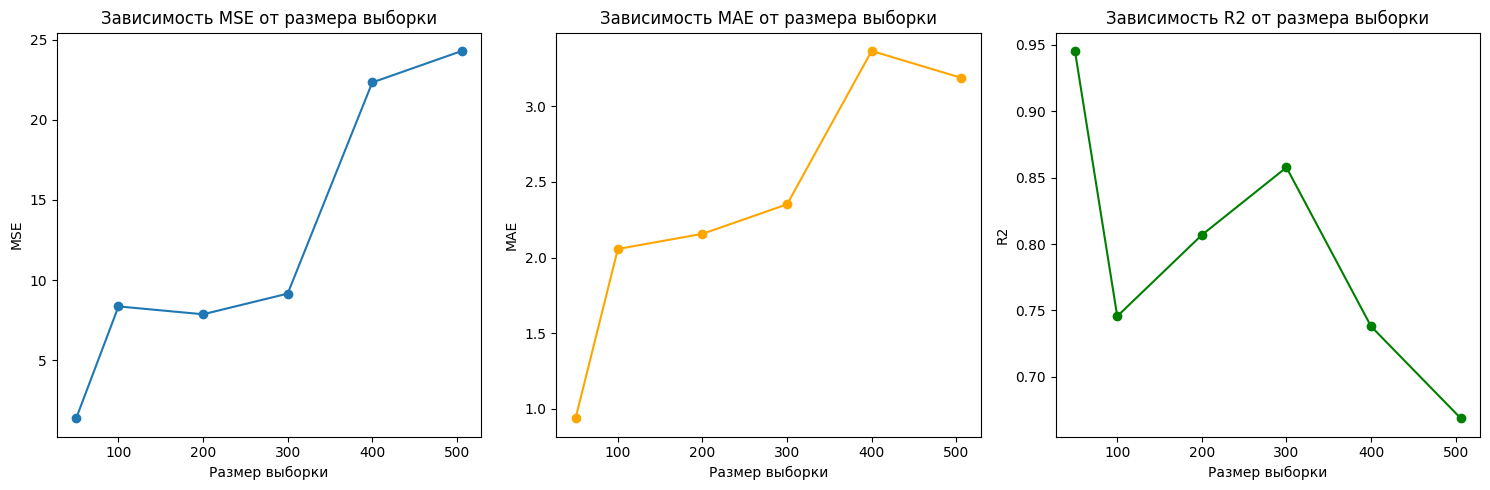

In [5]:
# Исправленный код для исследования влияния количества данных
sample_sizes = [50, 100, 200, 300, 400, 506]
results = []

for size in sample_sizes:
    # Выбираем подмножество данных (для numpy массивов используем обычную индексацию)
    X_subset = X[:size]
    y_subset = y[:size]
    
    # Разделяем на обучающую и тестовую выборки (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
    
    # Оцениваем модель
    mse, mae, r2 = evaluate_model(X_train, X_test, y_train, y_test)
    results.append((size, mse, mae, r2))

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results, columns=['Sample Size', 'MSE', 'MAE', 'R2'])
print("\nРезультаты для разных размеров выборки:")
print(results_df)

# Визуализация остается без изменений
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(results_df['Sample Size'], results_df['MSE'], 'o-')
plt.title('Зависимость MSE от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.plot(results_df['Sample Size'], results_df['MAE'], 'o-', color='orange')
plt.title('Зависимость MAE от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('MAE')

plt.subplot(1, 3, 3)
plt.plot(results_df['Sample Size'], results_df['R2'], 'o-', color='green')
plt.title('Зависимость R2 от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

Качество модели увеличивается с ростом числа элементов.


Результаты для разного количества признаков:
   Number of Features        MSE       MAE        R2
0                   1  46.144775  4.478336  0.370757
1                   2  31.243291  3.898760  0.573958
2                   5  27.891158  3.335727  0.619668
3                   8  25.652457  3.291643  0.650196
4                  13  24.291119  3.189092  0.668759


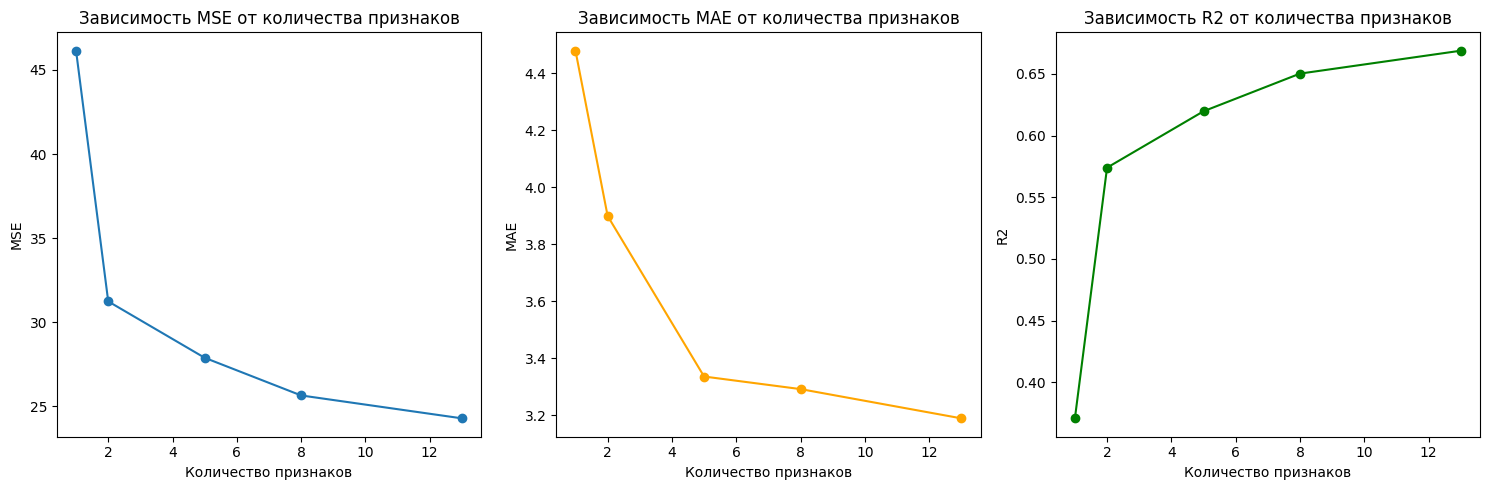

In [6]:
# Исправленный код для исследования влияния количества признаков
feature_indices = [
    [5],  # RM (1 признак)
    [5, 12],  # RM и LSTAT (2 признака)
    [5, 12, 10, 2, 9],  # RM, LSTAT, PTRATIO, INDUS, TAX (5 признаков)
    [5, 12, 10, 2, 9, 4, 6, 7],  # 8 признаков
    range(13)  # все 13 признаков
]

results_features = []

for indices in feature_indices:
    X_subset = X[:, indices]  # Выбираем нужные столбцы в numpy массиве
    
    # Разделяем на обучающую и тестовую выборки (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
    
    # Оцениваем модель
    mse, mae, r2 = evaluate_model(X_train, X_test, y_train, y_test)
    results_features.append((len(indices), mse, mae, r2))

# Создаем DataFrame с результатами
results_features_df = pd.DataFrame(results_features, columns=['Number of Features', 'MSE', 'MAE', 'R2'])
print("\nРезультаты для разного количества признаков:")
print(results_features_df)

# Визуализация остается без изменений
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(results_features_df['Number of Features'], results_features_df['MSE'], 'o-')
plt.title('Зависимость MSE от количества признаков')
plt.xlabel('Количество признаков')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.plot(results_features_df['Number of Features'], results_features_df['MAE'], 'o-', color='orange')
plt.title('Зависимость MAE от количества признаков')
plt.xlabel('Количество признаков')
plt.ylabel('MAE')

plt.subplot(1, 3, 3)
plt.plot(results_features_df['Number of Features'], results_features_df['R2'], 'o-', color='green')
plt.title('Зависимость R2 от количества признаков')
plt.xlabel('Количество признаков')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

Качество модели растёт с ростом числа признаков

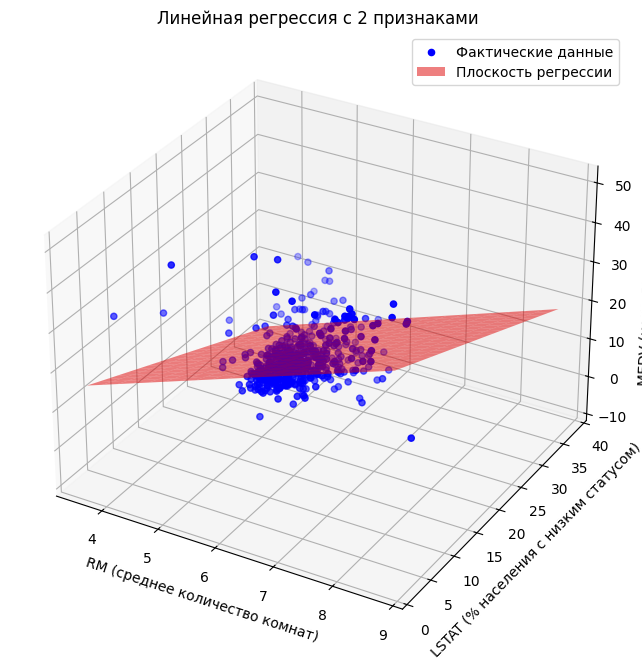


Оценка модели с 2 признаками:
MSE: 31.24
MAE: 3.90
R2: 0.57

Коэффициенты модели:
Intercept (свободный член): -1.36
Coefficient for RM: 5.09
Coefficient for LSTAT: -0.64


In [8]:
# Получаем имена признаков
feature_names = boston.feature_names

# Находим индексы нужных признаков
rm_idx = list(feature_names).index('RM')
lstat_idx = list(feature_names).index('LSTAT')

# Выбираем 2 наиболее значимых признака по индексам
X_2d = X[:, [rm_idx, lstat_idx]]

# Обучим модель
model_2d = LinearRegression()
model_2d.fit(X_2d, y)

# Создаем сетку для визуализации плоскости
x1 = np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 20)
x2 = np.linspace(X_2d[:, 1].min(), X_2d[:, 1].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1, x2)

# Предсказания для сетки
X_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_grid = model_2d.predict(X_grid).reshape(x1_grid.shape)

# 3D визуализация
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Точки данных
ax.scatter(X_2d[:, 0], X_2d[:, 1], y, c='blue', label='Фактические данные')

# Плоскость регрессии
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, color='red', label='Плоскость регрессии')

ax.set_xlabel('RM (среднее количество комнат)')
ax.set_ylabel('LSTAT (% населения с низким статусом)')
ax.set_zlabel('MEDV (цена дома в $1000)')
ax.set_title('Линейная регрессия с 2 признаками')
ax.legend()

plt.show()

# Оценка модели
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)
mse, mae, r2 = evaluate_model(X_train, X_test, y_train, y_test)

print("\nОценка модели с 2 признаками:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

# Коэффициенты модели
print("\nКоэффициенты модели:")
print(f"Intercept (свободный член): {model_2d.intercept_:.2f}")
print(f"Coefficient for RM: {model_2d.coef_[0]:.2f}")
print(f"Coefficient for LSTAT: {model_2d.coef_[1]:.2f}")